# 🐠 TIỀN XỬ LÝ DỮ LIỆU - MÔ HÌNH CƠ BẢN

## 📋 Thông tin chung
**Dự án:** Phân loại động vật biển (Marine Animal Classification)  
**File:** `data_preprocessing_basic.ipynb`  
**Mục tiêu:** Chuẩn bị dữ liệu cho các mô hình Deep Learning cơ bản (CNN, simple neural networks)  
**Số lớp:** 23 loài động vật biển  
**Phương pháp:** Load toàn bộ vào RAM, xử lý nhanh gọn  
**Thích hợp cho:** Prototyping, học tập, thử nghiệm nhanh

---

## 🎯 Hướng tiền xử lý

### **Bước 1: Import & Setup (Cell 1)**
- Load các thư viện cần thiết (matplotlib, PIL, NumPy, sklearn)
- Xác định đường dẫn dataset `./raw_dataset`
- Lấy danh sách 23 lớp động vật biển

### **Bước 2: Hiển thị mẫu (Cell 2)**
- Vẽ 1 ảnh đại diện từ mỗi lớp (5×5 grid)
- Hiển thị tên class và số lượng ảnh trong mỗi thư mục
- **Mục đích:** Kiểm tra dữ liệu gốc, xác định format ảnh

### **Bước 3: Load & Xử lý dữ liệu (Cell 3)**
- Load tất cả ảnh từ thư mục vào RAM
- Resize tất cả về kích thước **224×224**
- Chuẩn hóa pixel về khoảng **[0, 1]** (MinMax normalization)
- Tạo numpy arrays: `X` (ảnh) và `y` (labels)

### **Bước 4: Tách train/val/test (Cell 4)**
- Tách dữ liệu **60% train / 20% val / 20% test**
- Bước 1: Tách train (60%) vs temp (40%)
- Bước 2: Chia temp thành val (20%) và test (20%)
- Sử dụng `stratify=y` để cân bằng phân bố lớp

### **Bước 5: Thống kê & Visualize (Cell 5)**
- Tính phân bố số ảnh theo mỗi lớp (train/val/test)
- Vẽ 3 biểu đồ so sánh train vs val vs test distribution
- In bảng thống kê chi tiết cho 23 lớp

### **Bước 6: Lưu dữ liệu (Cell 6)**
- Lưu train/val/test data dưới dạng `.npz` (compressed)
- Lưu class mapping thành `class_mapping.json`
- Metadata về preprocessing

### **Bước 7: Xem trước (Cell 7)**
- Hiển thị 25 ảnh đã xử lý từ train set
- Kiểm tra chất lượng, format, và label của dữ liệu

---

## 📊 Cấu trúc dữ liệu output

```
processed_data/
├── train_data.npz       # Shape: (X_train, y_train) - 60% dữ liệu
├── val_data.npz         # Shape: (X_val, y_val) - 20% dữ liệu
├── test_data.npz        # Shape: (X_test, y_test) - 20% dữ liệu
└── class_mapping.json   # {0: "Clams", 1: "Corals", ...23 lớp}
```

---

## 🚀 Hướng đi sau này

### **1. Huấn luyện mô hình cơ bản**
```python
# Load dữ liệu
train_data = np.load('processed_data/train_data.npz')
X_train, y_train = train_data['X'], train_data['y']

val_data = np.load('processed_data/val_data.npz')
X_val, y_val = val_data['X'], val_data['y']

# Định nghĩa mô hình cơ bản
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(23, activation='softmax')
])

# Train với validation
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)
```

### **2. Các mô hình phù hợp cho Basic**

| Mô hình | Tham số | Training Time | Accuracy | Khuyến nghị |
|---------|--------|---------------|----------|------------|
| **CNN cơ bản** | 1-5M | 5-10 phút | 60-70% | ⭐ Simple |
| **MobileNetV2** | 3.5M | 10-15 phút | 70-75% | Good |
| **ResNet18** | 11M | 15-30 phút | 75-80% | Better |
| **VGG16** | 138M | 30-60 phút | 72-78% | Chậm |

### **3. Các bước tiếp theo**

**Phase 1: Prototyping**
1. Load train/val/test từ `.npz`
2. Tạo mô hình CNN đơn giản
3. Train và đánh giá trên validation set
4. Tinh chỉnh hyperparameters

**Phase 2: Cải thiện**
1. Thêm regularization (Dropout, L2)
2. Data augmentation (flip, rotate, brightness)
3. Batch normalization
4. Early stopping dựa trên validation loss

**Phase 3: Optimization**
1. Chuyển sang mô hình phức tạp hơn
2. Transfer learning với pre-trained weights
3. Fine-tuning các layer
4. Ensemble models

### **4. Hyperparameters gợi ý**

```python
# Learning rate
learning_rate = 0.001

# Batch size
batch_size = 32  # Hoặc 64

# Epochs
epochs = 20-50

# Optimizer
optimizer = 'adam'

# Loss function
loss = 'categorical_crossentropy'

# Metrics
metrics = ['accuracy']
```

---

## 📈 So sánh: Basic vs Complex

| Tiêu chí | **Basic** | Complex |
|---------|----------|---------|
| **RAM cần** | ~2 GB ✅ | ~500 MB ✅✅ |
| **Load speed** | Nhanh (1 lần) | Chậm (batch-by-batch) |
| **Augmentation** | Không | Có (8 techniques, 4x data) |
| **Normalization** | MinMax (0-1) | ImageNet |
| **Phù hợp cho** | **Prototyping** | Production |
| **Accuracy kỳ vọng** | 60-75% | 85-92% |
| **Training time** | Nhanh | Lâu hơn |
| **Model complexity** | CNN cơ bản | ResNet, VGG |

---

## 🎯 Khi nào dùng Basic?

✅ Dùng **Basic** nếu:
- Đang học tập, thử nghiệm
- Cần kết quả nhanh (prototyping)
- Có RAM đủ (~2 GB)
- Mô hình đơn giản (<5M params)
- Training time < 30 phút là đủ

❌ Không dùng **Basic** nếu:
- Cần accuracy cao (>85%)
- Có dữ liệu rất lớn (>50k ảnh)
- RAM bị hạn chế (<2 GB)
- Sử dụng mô hình phức tạp (ResNet, VGG)

---

## 💾 Thông số chuẩn hóa

- **Normalization**: MinMax (0-1)
- **Formula**: `X_normalized = X / 255.0`
- **Kích thước ảnh**: 224 × 224 × 3
- **Data type**: float32
- **Range**: [0.0, 1.0]

---

## ⚡ Lưu ý quan trọng

✅ **Ưu điểm:**
- ✓ Load nhanh, xử lý đơn giản
- ✓ Dễ debug và quan sát dữ liệu
- ✓ Phù hợp cho learning path
- ✓ Có thể load toàn bộ vào RAM
- ✓ Chia thành train/val/test

⚠️ **Nhược điểm:**
- ✗ Không augmentation → dễ overfit
- ✗ RAM yêu cầu cao hơn batch processing
- ✗ Accuracy thấp hơn complex pipeline
- ✗ Không tối ưu cho production

---

## 🔄 Lộ trình học tập

```
1. Hiểu dữ liệu (Data Exploration)
   ↓
2. Tiền xử lý cơ bản (Basic Preprocessing) ← YOU ARE HERE
   ↓
3. Xây dựng CNN đơn giản
   ↓
4. Train & Evaluate với validation set
   ↓
5. Data Augmentation (Nâng cao)
   ↓
6. Transfer Learning
   ↓
7. Production Deployment
```

In [5]:
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np

# Đường dẫn đến thư mục dataset
dataset_path = './raw_dataset'

# Lấy danh sách các lớp (thư mục con)
classes = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])

print(f"Tổng số lớp: {len(classes)}")
print(f"Các lớp: {classes}")

Tổng số lớp: 23
Các lớp: ['Clams', 'Corals', 'Crabs', 'Dolphin', 'Eel', 'Fish', 'Jelly Fish', 'Lobster', 'Nudibranchs', 'Octopus', 'Otter', 'Penguin', 'Puffers', 'Sea Rays', 'Sea Urchins', 'Seahorse', 'Seal', 'Sharks', 'Shrimp', 'Squid', 'Starfish', 'Turtle_Tortoise', 'Whale']


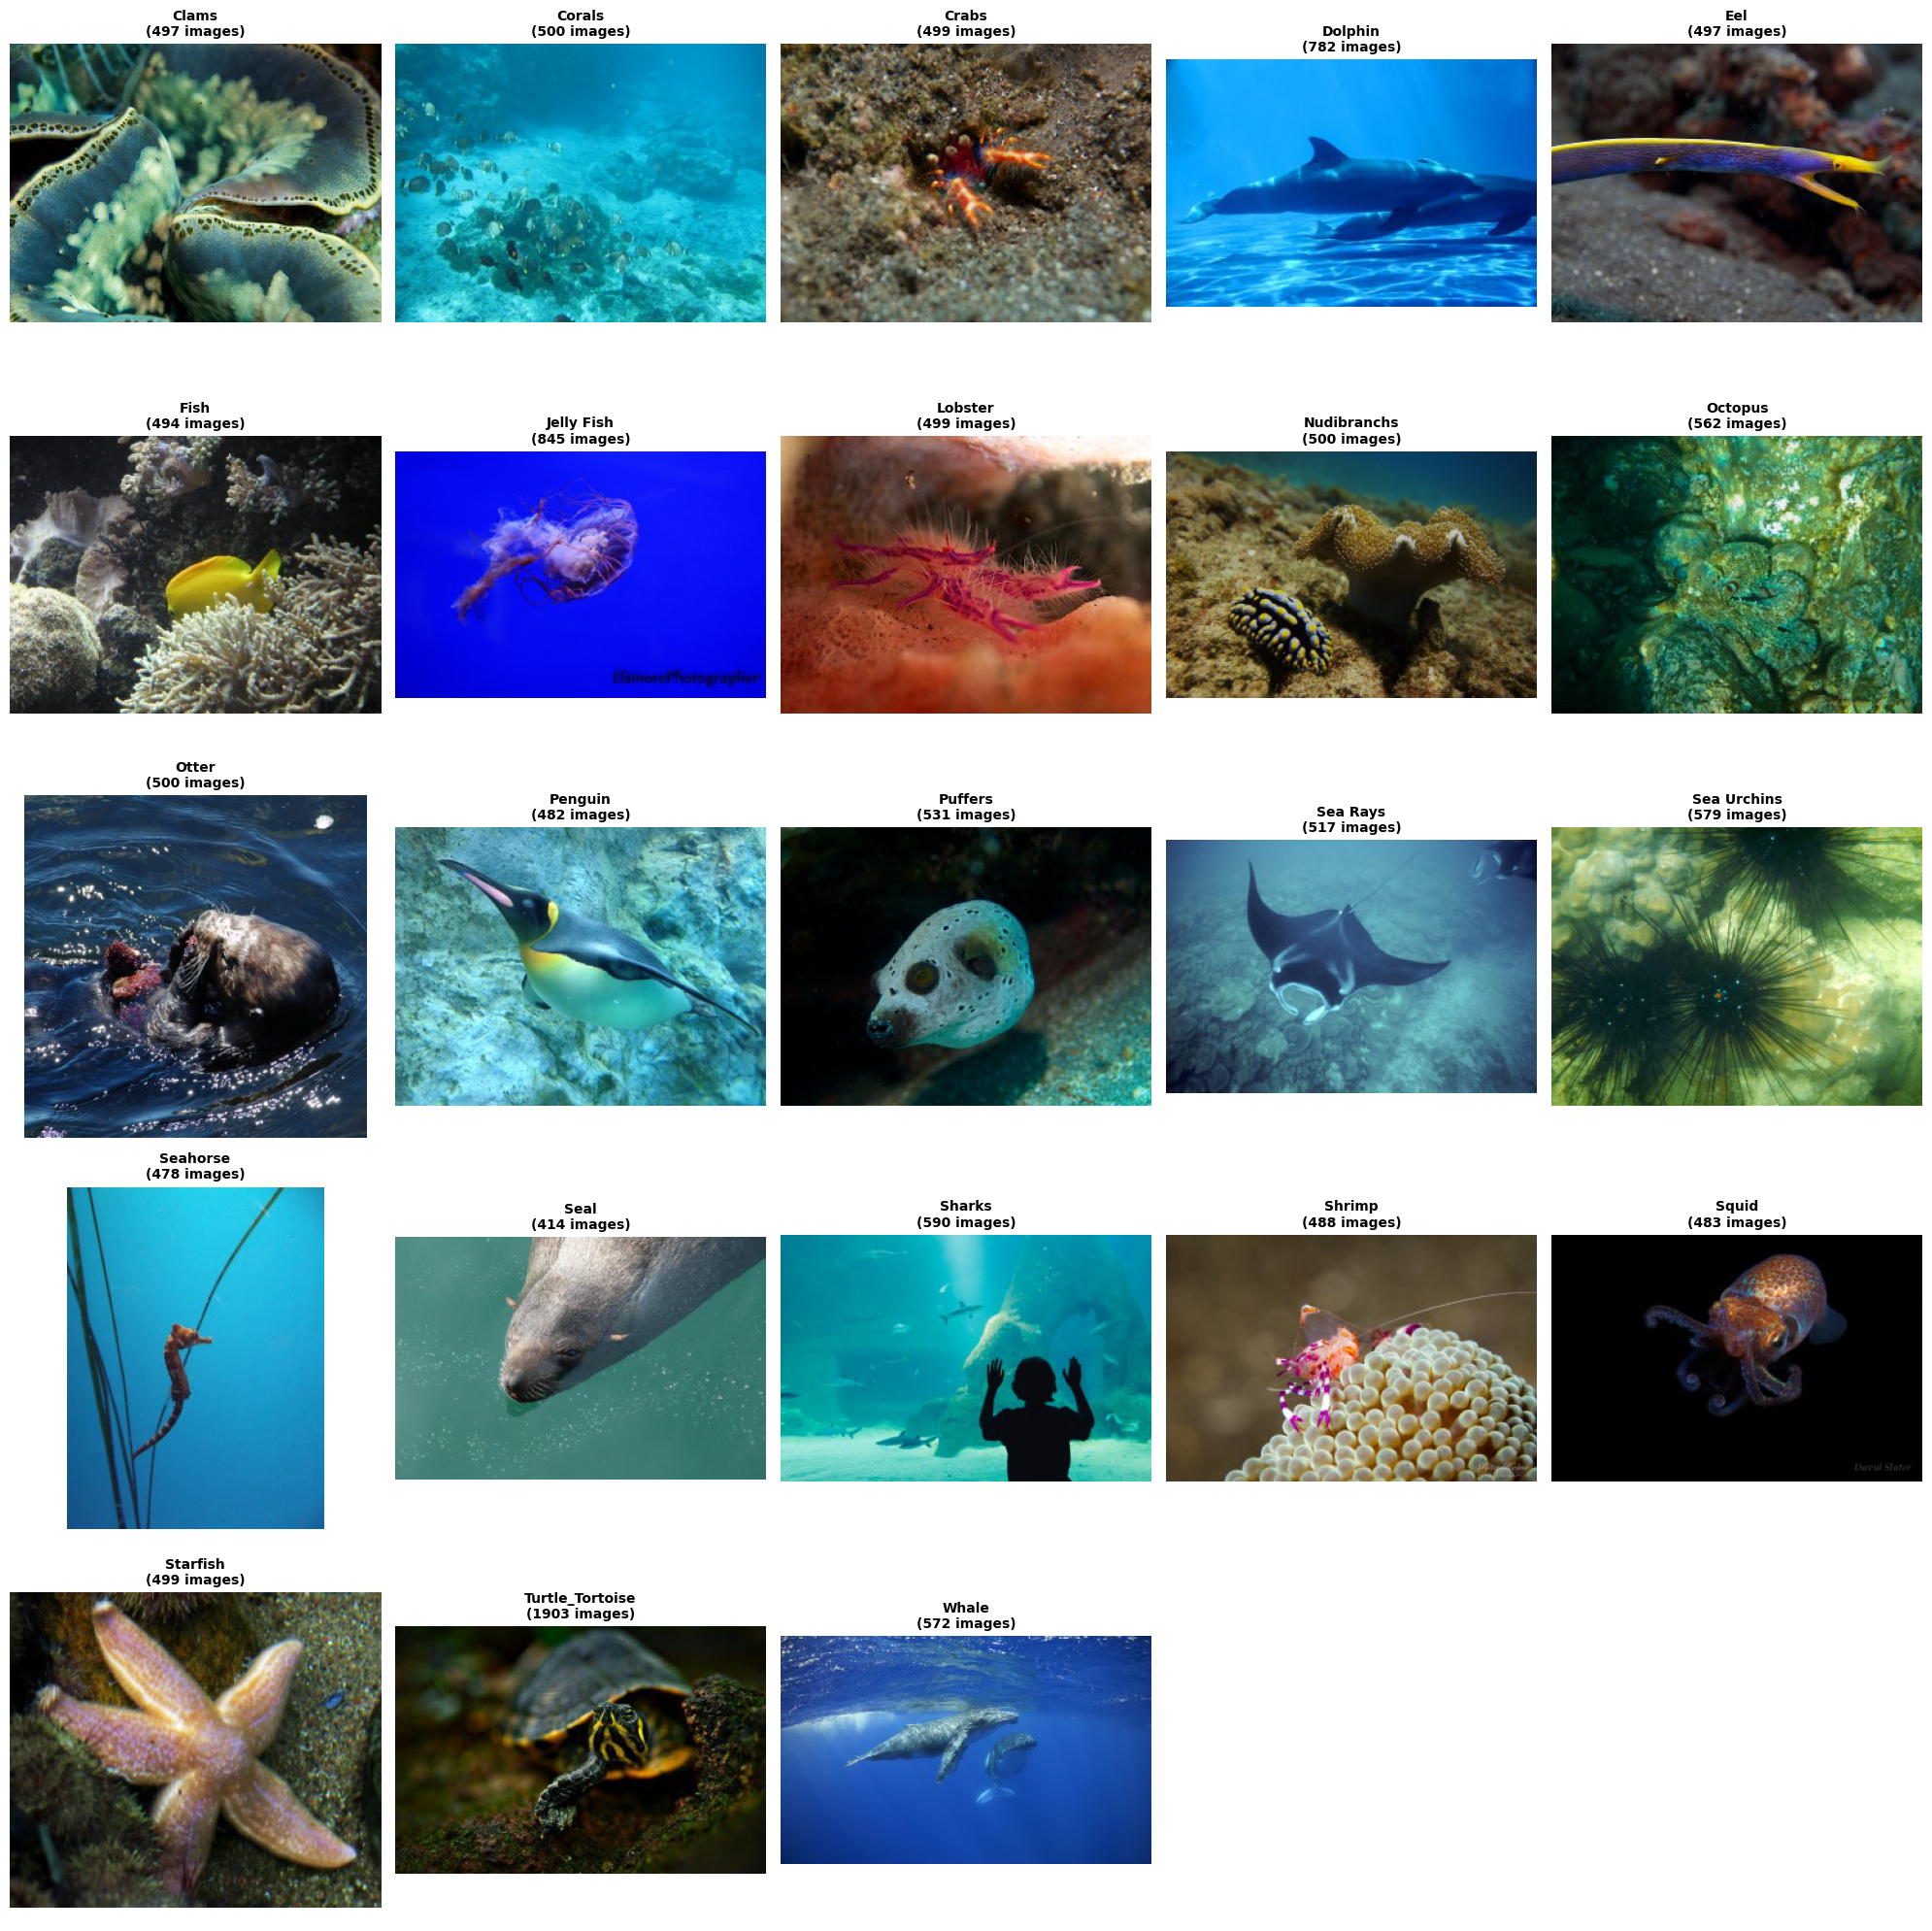


Đã hiển thị 1 ảnh mẫu từ mỗi lớp trong tổng số 23 lớp


In [6]:
# Hiển thị 1 ảnh từ mỗi lớp
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.ravel()

for idx, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    
    # Lấy danh sách các file ảnh trong thư mục
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    
    if images:
        # Lấy ảnh đầu tiên
        img_path = os.path.join(class_path, images[0])
        img = Image.open(img_path)
        
        # Hiển thị ảnh
        axes[idx].imshow(img)
        axes[idx].set_title(f'{class_name}\n({len(images)} images)', fontsize=10, fontweight='bold')
        axes[idx].axis('off')
    else:
        axes[idx].text(0.5, 0.5, 'No images', ha='center', va='center')
        axes[idx].set_title(class_name, fontsize=10)
        axes[idx].axis('off')

# Ẩn các subplot thừa nếu có
for idx in range(len(classes), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print(f"\nĐã hiển thị 1 ảnh mẫu từ mỗi lớp trong tổng số {len(classes)} lớp")

In [ ]:
from sklearn.preprocessing import LabelEncoder
import cv2
import shutil
from tqdm import tqdm

# Chuẩn hóa kích thước ảnh
IMAGE_SIZE = (224, 224)

def preprocess_image(image_path, target_size=IMAGE_SIZE):
    """Đọc và chuẩn hóa ảnh"""
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    # Chuyển BGR sang RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Resize ảnh
    img = cv2.resize(img, target_size)
    
    # Chuẩn hóa giá trị pixel (0-1)
    img = img.astype('float32') / 255.0
    
    return img

# Tạo danh sách dữ liệu
print("\n📊 Đang xử lý dữ liệu...")

data_list = []
labels_list = []

for class_idx, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    
    for img_file in tqdm(images, desc=f"Processing {class_name}"):
        img_path = os.path.join(class_path, img_file)
        processed_img = preprocess_image(img_path)
        
        if processed_img is not None:
            data_list.append(processed_img)
            labels_list.append(class_idx)

# Chuyển thành numpy array
X = np.array(data_list)
y = np.array(labels_list)

print(f"\n✓ Tổng số ảnh: {len(X)}")
print(f"✓ Shape dữ liệu: {X.shape}")
print(f"✓ Số lớp: {len(classes)}")

✓ Đã tạo cấu trúc thư mục

📊 Đang xử lý dữ liệu...


Processing Whale: 100%|██████████| 572/572 [00:04<00:00, 115.94it/s]




✓ Tổng số ảnh: 13711
✓ Shape dữ liệu: (13711, 224, 224, 3)
✓ Số lớp: 23


In [8]:
# 4. Tách dữ liệu train/val/test (60% train / 20% val / 20% test)
# Bước 1: Tách train (60%) vs temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Bước 2: Tách temp (40%) thành val (50% của temp = 20% tổng) và test (50% của temp = 20% tổng)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\n📈 Chia dữ liệu:")
print(f"  • Train: {X_train.shape[0]} ảnh ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  • Val:   {X_val.shape[0]} ảnh ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"  • Test:  {X_test.shape[0]} ảnh ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"  • Tổng:  {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]} ảnh")

# 5. Tạo mapping class -> index
class_mapping = {idx: class_name for idx, class_name in enumerate(classes)}
print(f"\n📋 Mapping lớp:")
for idx, class_name in class_mapping.items():
    print(f"  {idx}: {class_name}")


📈 Chia dữ liệu:
  • Train: 8226 ảnh (60.0%)
  • Val:   2742 ảnh (20.0%)
  • Test:  2743 ảnh (20.0%)
  • Tổng:  13711 ảnh

📋 Mapping lớp:
  0: Clams
  1: Corals
  2: Crabs
  3: Dolphin
  4: Eel
  5: Fish
  6: Jelly Fish
  7: Lobster
  8: Nudibranchs
  9: Octopus
  10: Otter
  11: Penguin
  12: Puffers
  13: Sea Rays
  14: Sea Urchins
  15: Seahorse
  16: Seal
  17: Sharks
  18: Shrimp
  19: Squid
  20: Starfish
  21: Turtle_Tortoise
  22: Whale



📊 Phân bố dữ liệu theo lớp:
          Class  Train  Val  Test
          Clams    298   99   100
         Corals    300  100   100
          Crabs    299  100   100
        Dolphin    469  156   157
            Eel    298   99   100
           Fish    297   99    98
     Jelly Fish    507  169   169
        Lobster    299  100   100
    Nudibranchs    300  100   100
        Octopus    337  112   113
          Otter    300  100   100
        Penguin    289   97    96
        Puffers    319  106   106
       Sea Rays    310  103   104
    Sea Urchins    347  116   116
       Seahorse    287   96    95
           Seal    249   83    82
         Sharks    354  118   118
         Shrimp    293   98    97
          Squid    290   97    96
       Starfish    299  100   100
Turtle_Tortoise   1142  380   381
          Whale    343  114   115


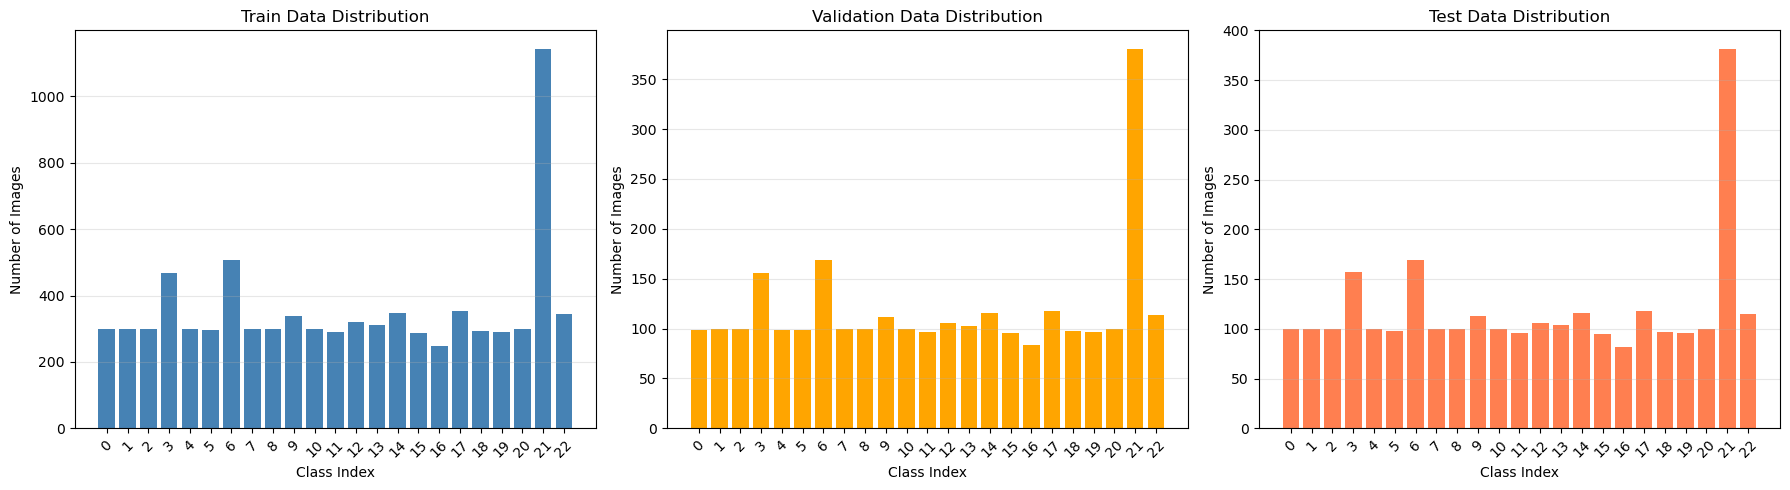


✓ Tổng train: 8226
✓ Tổng val: 2742
✓ Tổng test: 2743


In [9]:
# 6. Thống kê phân bố lớp
import pandas as pd

train_counts = pd.Series(y_train).value_counts().sort_index()
val_counts = pd.Series(y_val).value_counts().sort_index()
test_counts = pd.Series(y_test).value_counts().sort_index()

stats_df = pd.DataFrame({
    'Class': [classes[i] for i in range(len(classes))],
    'Train': [train_counts.get(i, 0) for i in range(len(classes))],
    'Val': [val_counts.get(i, 0) for i in range(len(classes))],
    'Test': [test_counts.get(i, 0) for i in range(len(classes))]
})

print("\n📊 Phân bố dữ liệu theo lớp:")
print(stats_df.to_string(index=False))

# 7. Vẽ biểu đồ phân bố
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Train data distribution
axes[0].bar(range(len(classes)), [train_counts.get(i, 0) for i in range(len(classes))], color='steelblue')
axes[0].set_xlabel('Class Index')
axes[0].set_ylabel('Number of Images')
axes[0].set_title('Train Data Distribution')
axes[0].set_xticks(range(len(classes)))
axes[0].set_xticklabels(range(len(classes)), rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Val data distribution
axes[1].bar(range(len(classes)), [val_counts.get(i, 0) for i in range(len(classes))], color='orange')
axes[1].set_xlabel('Class Index')
axes[1].set_ylabel('Number of Images')
axes[1].set_title('Validation Data Distribution')
axes[1].set_xticks(range(len(classes)))
axes[1].set_xticklabels(range(len(classes)), rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Test data distribution
axes[2].bar(range(len(classes)), [test_counts.get(i, 0) for i in range(len(classes))], color='coral')
axes[2].set_xlabel('Class Index')
axes[2].set_ylabel('Number of Images')
axes[2].set_title('Test Data Distribution')
axes[2].set_xticks(range(len(classes)))
axes[2].set_xticklabels(range(len(classes)), rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Tổng train: {len(X_train)}")
print(f"✓ Tổng val: {len(X_val)}")
print(f"✓ Tổng test: {len(X_test)}")

In [10]:
# 8. Chuẩn bị dữ liệu dạng array để lưu
print("\n💾 Chuẩn bị dữ liệu để lưu...")

# Lưu train, val và test data dưới dạng .npz (compressed)
np.savez_compressed(
    'processed_data/train_data.npz',
    X=X_train,
    y=y_train
)

np.savez_compressed(
    'processed_data/val_data.npz',
    X=X_val,
    y=y_val
)

np.savez_compressed(
    'processed_data/test_data.npz',
    X=X_test,
    y=y_test
)

print("✓ Đã lưu train_data.npz, val_data.npz và test_data.npz")

# Lưu class mapping
import json
with open('processed_data/class_mapping.json', 'w') as f:
    json.dump(class_mapping, f, indent=2)

print("✓ Đã lưu class_mapping.json")

print("\n" + "="*60)
print("✅ TIỀN XỬ LÝ DỮ LIỆU HOÀN THÀNH")
print("="*60)
print(f"\n📁 Dữ liệu đã được lưu trong thư mục: 'processed_data'")
print(f"   - train_data.npz: Shape {X_train.shape}")
print(f"   - val_data.npz:   Shape {X_val.shape}")
print(f"   - test_data.npz:  Shape {X_test.shape}")
print(f"   - class_mapping.json: {len(class_mapping)} lớp")
print(f"\n✨ Sẵn sàng để huấn luyện mô hình!")


💾 Chuẩn bị dữ liệu để lưu...
✓ Đã lưu train_data.npz, val_data.npz và test_data.npz
✓ Đã lưu class_mapping.json

✅ TIỀN XỬ LÝ DỮ LIỆU HOÀN THÀNH

📁 Dữ liệu đã được lưu trong thư mục: 'processed_data'
   - train_data.npz: Shape (8226, 224, 224, 3)
   - val_data.npz:   Shape (2742, 224, 224, 3)
   - test_data.npz:  Shape (2743, 224, 224, 3)
   - class_mapping.json: 23 lớp

✨ Sẵn sàng để huấn luyện mô hình!
✓ Đã lưu train_data.npz, val_data.npz và test_data.npz
✓ Đã lưu class_mapping.json

✅ TIỀN XỬ LÝ DỮ LIỆU HOÀN THÀNH

📁 Dữ liệu đã được lưu trong thư mục: 'processed_data'
   - train_data.npz: Shape (8226, 224, 224, 3)
   - val_data.npz:   Shape (2742, 224, 224, 3)
   - test_data.npz:  Shape (2743, 224, 224, 3)
   - class_mapping.json: 23 lớp

✨ Sẵn sàng để huấn luyện mô hình!



👀 Xem trước ảnh đã xử lý (từ train set):


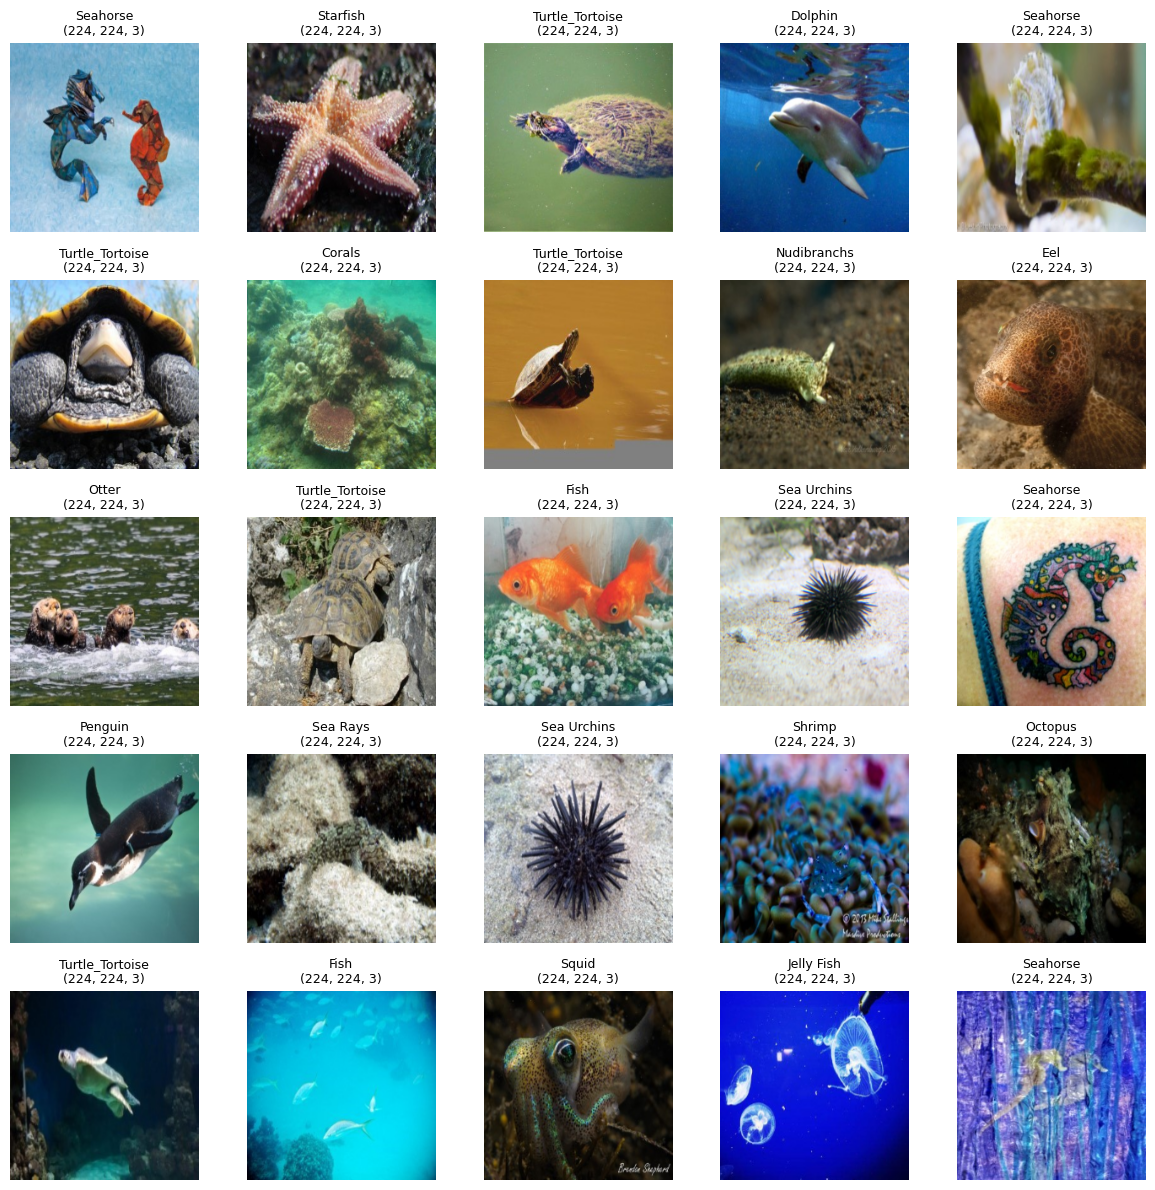

✓ Đã hiển thị mẫu dữ liệu đã xử lý


In [11]:
# 9. Xem trước một số ảnh đã xử lý
print("\n👀 Xem trước ảnh đã xử lý (từ train set):")

fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.ravel()

for idx in range(min(25, len(X_train))):
    axes[idx].imshow(X_train[idx])
    class_name = classes[y_train[idx]]
    axes[idx].set_title(f"{class_name}\n{X_train[idx].shape}", fontsize=9)
    axes[idx].axis('off')

for idx in range(16, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("✓ Đã hiển thị mẫu dữ liệu đã xử lý")